In [1]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
library(ggplot2)
library(ggpubr)
is_dark_color <- function(hex) {
  rgb <- col2rgb(hex)
  
  luminance <- 0.299 * rgb[1,] + 0.587 * rgb[2,] + 0.114 * rgb[3,]
  if(luminance < 128){
  return('white')
  }else{return('black')}
}

color_annotation <- read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

Warning message:
“package ‘plyr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”

Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




# Sample level

In [2]:
df<-read.csv("06_Burton_Dataset/IGHG2_IGHG3_Ratio.csv") %>% filter(days=="d0")
df$AIFI_L3<-"Core memroy B cell"

In [3]:
df$age_group<-factor(df$age_group,levels=c("young","old"))

In [6]:
df

X,IGHG2,sample,days,donor,age_group,IGHG3,IGHG2_IGHG3_Ratio,AIFI_L3
<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>
1,0.49029547,520P_d0,d0,520P,old,0.3916156,1.25198152,Core memroy B cell
2,0.11497553,526W_d0,d0,526W,old,0.2000996,0.57459148,Core memroy B cell
3,0.63501842,536G_d0,d0,536G,old,0.3880103,1.63660216,Core memroy B cell
4,0.56974114,541M_d0,d0,541M,old,0.5688947,1.00148784,Core memroy B cell
5,0.23940581,543P_d0,d0,543P,old,0.3176161,0.75375847,Core memroy B cell
6,0.12987752,544Q_d0,d0,544Q,old,0.2228264,0.58286419,Core memroy B cell
7,0.66339147,545R_d0,d0,545R,old,0.3349369,1.98064637,Core memroy B cell
8,0.27013731,559G_d0,d0,559G,young,1.0006030,0.26997452,Core memroy B cell
9,0.58457266,562K_d0,d0,562K,young,0.6237279,0.93722392,Core memroy B cell


In [4]:
table(df$age_group)


young   old 
    8     8 

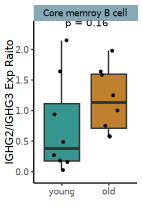

In [9]:
options(repr.plot.width = 30/25.4, repr.plot.height = 45/25.4)

p<-ggplot(df, aes(x=`age_group`, y=IGHG2_IGHG3_Ratio, fill=`age_group`)) +
    geom_boxplot(outlier.shape = NA,lwd=0.3) +
geom_point(position = position_jitter(width = 0.2),color="black", size=0.8,stroke=0) +
theme_classic(base_size=6)+  
stat_compare_means(aes(label = paste0("p = ", after_stat(p.format))),
    size=2,
    label.x=1.25,  
    vjust = -2)+theme(strip.background = element_rect(linewidth = 0))+
    scale_fill_manual(values = c("old" = '#bf812d', "young" = '#35978f'))+
    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0.1, 0.15)))+
theme(legend.position="none")+
xlab('')+
ylab('IGHG2/IGHG3 Exp Raito')+
facet_wrap(~AIFI_L3,  scale='free_y') 

g <- ggplot_gtable(ggplot_build(p))

strips <- which(grepl('strip-', g$layout$name))

pal <- color_vector['CM CD4 T cell']
text_color <- sapply(color_vector['CM CD4 T cell'], is_dark_color)

for (i in seq_along(strips)) {
  k <- which(grepl('rect', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  l <- which(grepl('titleGrob', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  g$grobs[[strips[i]]]$grobs[[1]]$children[[k]]$gp$fill <-  adjustcolor(pal[i], alpha.f = 0.8)
  g$grobs[[strips[i]]]$grobs[[1]]$children[[l]]$children[[1]]$gp$col <- text_color[i]
}

plot(g)

ggsave('FigureJ.pdf',g,width = 30/25.4,height = 45/25.4)